In [2]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Get the data
log = pd.read_csv("login.csv")

In [3]:
# Twitter Api Credentials
consumerKey = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumerSecret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
accessToken = 'XXXXXXXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXX'
accessTokenSecret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

In [4]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [5]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) I look forward to working with the new administration and leaders on both sides in Congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home.

2) Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.

3) Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But regardless of whether you vote by mail or in person this year, I hope you plan to make your voice heard. Visit https://t.co/TmsHAC9MGv for more information.

4) @MohamedBinZayed The UAE is an essential partner in stopping polio in Pakistan. Thank you @MohamedBinZayed for your continued commi

In [31]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,@MohamedBinZayed The UAE is an essential partn...
4,"For decades, @Rotary has worked tirelessly to ..."


In [32]:
df['Tweets'][1]

'Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.'

In [33]:
df['Tweets'][4]

'For decades, @Rotary has worked tirelessly to #EndPolio. Today, the health infrastructure they’ve built around the world is supporting the COVID-19 response. #WorldPolioDay https://t.co/67liH7akNH'

In [36]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+','', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,I look forward to working with the new adminis...
1,Congratulations to President-Elect Biden and V...
2,"Here in Washington, we always vote by mail. It..."
3,The UAE is an essential partner in stopping p...
4,"For decades, has worked tirelessly to EndPoli..."
...,...
95,Most of my conversations these days are about ...
96,Thank you for the conversation and partnersh...
97,I’m hopeful that this program will improve our...
98,: When will America be able to get back to wor...


In [37]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,I look forward to working with the new adminis...,0.577273,0.268182
1,Congratulations to President-Elect Biden and V...,0.750000,0.250000
2,"Here in Washington, we always vote by mail. It...",0.431250,0.350000
3,The UAE is an essential partner in stopping p...,0.300000,0.000000
4,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000
...,...,...,...
95,Most of my conversations these days are about ...,0.325000,0.058333
96,Thank you for the conversation and partnersh...,0.316667,0.058333
97,I’m hopeful that this program will improve our...,0.375000,-0.125000
98,: When will America be able to get back to wor...,0.312500,0.250000


In [34]:
df['Tweets'][1]

'Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.'

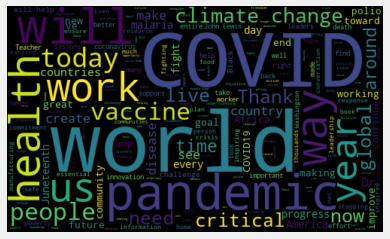

In [38]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [39]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df
    


,Tweets,Subjectivity,Polarity,Analysis
0,I look forward to working with the new adminis...,0.577273,0.268182,Positive
1,Congratulations to President-Elect Biden and V...,0.750000,0.250000,Positive
2,"Here in Washington, we always vote by mail. It...",0.431250,0.350000,Positive
3,The UAE is an essential partner in stopping p...,0.300000,0.000000,Neutral
4,"For decades, has worked tirelessly to EndPoli...",0.250000,0.250000,Positive
...,...,...,...,...
95,Most of my conversations these days are about ...,0.325000,0.058333,Positive
96,Thank you for the conversation and partnersh...,0.316667,0.058333,Positive
97,I’m hopeful that this program will improve our...,0.375000,-0.125000,Negative
98,: When will America be able to get back to wor...,0.312500,0.250000,Positive


In [40]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['Tweets'][i])
        print()
        j= j+1

Printing positive tweets:

1) I look forward to working with the new administration and leaders on both sides in Congress on getting the surging pandemic under control, engaging partners around the world on issues like poverty and climate change, and addressing issues of inequality and opportunity at home.

2) Congratulations to President-Elect Biden and Vice President-Elect Harris. Thank you to the election officials and campaign workers who worked tirelessly to ensure a record number of Americans could cast a ballot and have it counted during such an challenging time for our country.

3) Here in Washington, we always vote by mail. It's a safe and secure way to shape the future of our country. But regardless of whether you vote by mail or in person this year, I hope you plan to make your voice heard. Visit  for more information.

4) For decades,  has worked tirelessly to EndPolio. Today, the health infrastructure they’ve built around the world is supporting the COVID-19 response. Worl

In [41]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j=j+1

Printing negative tweets:

1) 30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

2) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

3) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

4) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

5) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

6) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded

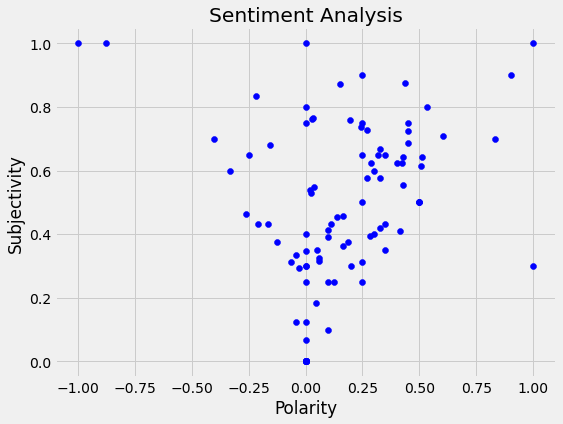

In [42]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [43]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

62.0

In [44]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

15.0

In [45]:
# Show the value counts
df['Analysis'].value_counts()

Positive    62
Neutral     23
Negative    15
Name: Analysis, dtype: int64

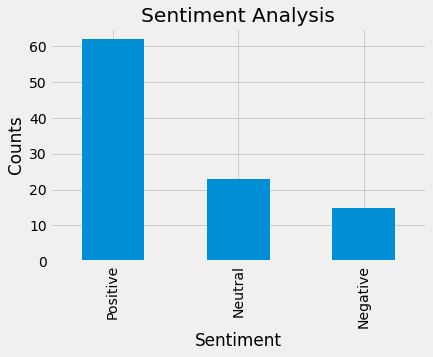

In [46]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()